# Example of the aitlas toolbox in the context of image segmentation

## Import the required packages

In [ ]:
from aitlas.datasets import PixBox_AI4QCDataset
from aitlas.utils import image_loader
from aitlas.models import DeepLabV3
from aitlas.transforms import ResizeToTensor

## Visualize images and masks

Total number of patches: 29


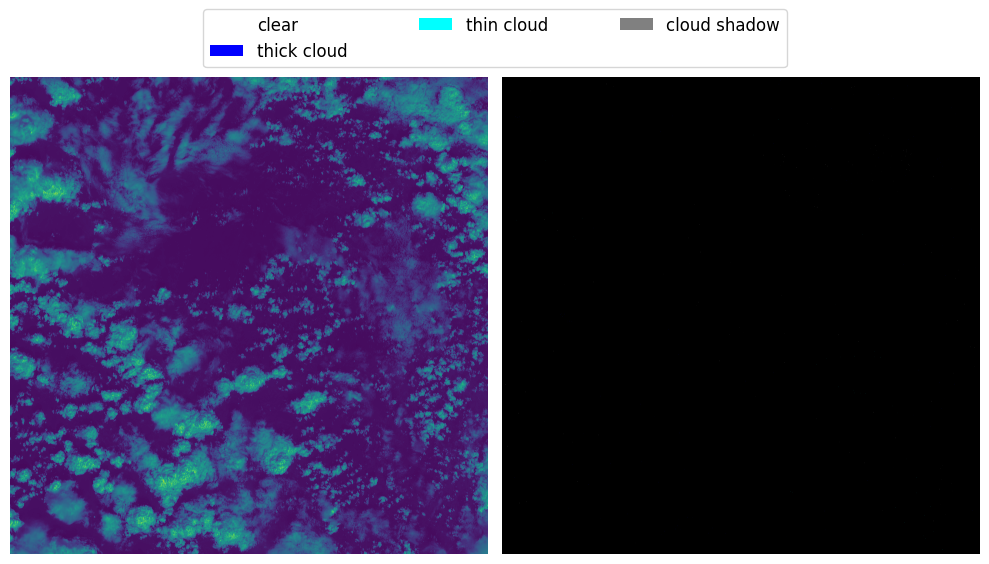

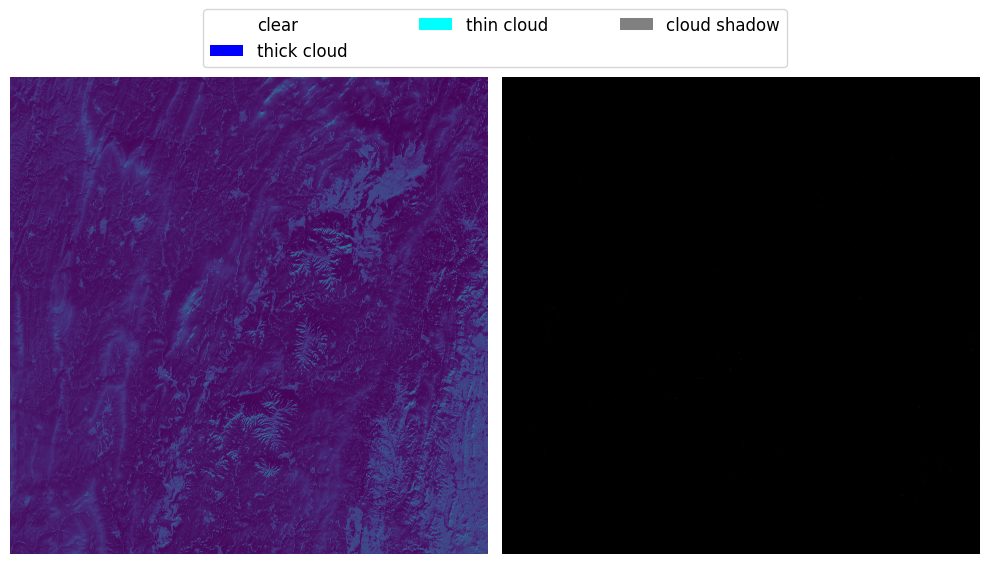

In [3]:
dataset_config = {
    "data_dir": "/home/dragik/data/PixBox",
    "selection":"rgb"
}
dataset = PixBox_AI4QCDataset(dataset_config)

print(f"Total number of patches: {len(dataset)}")
dataset.show_image(4);
dataset.show_image(10);

In [4]:
dataset.data_distribution_table()

,Number of pixels
clear,71988.0
thick cloud,19866.0
thin cloud,51480.0
cloud shadow,7605.0


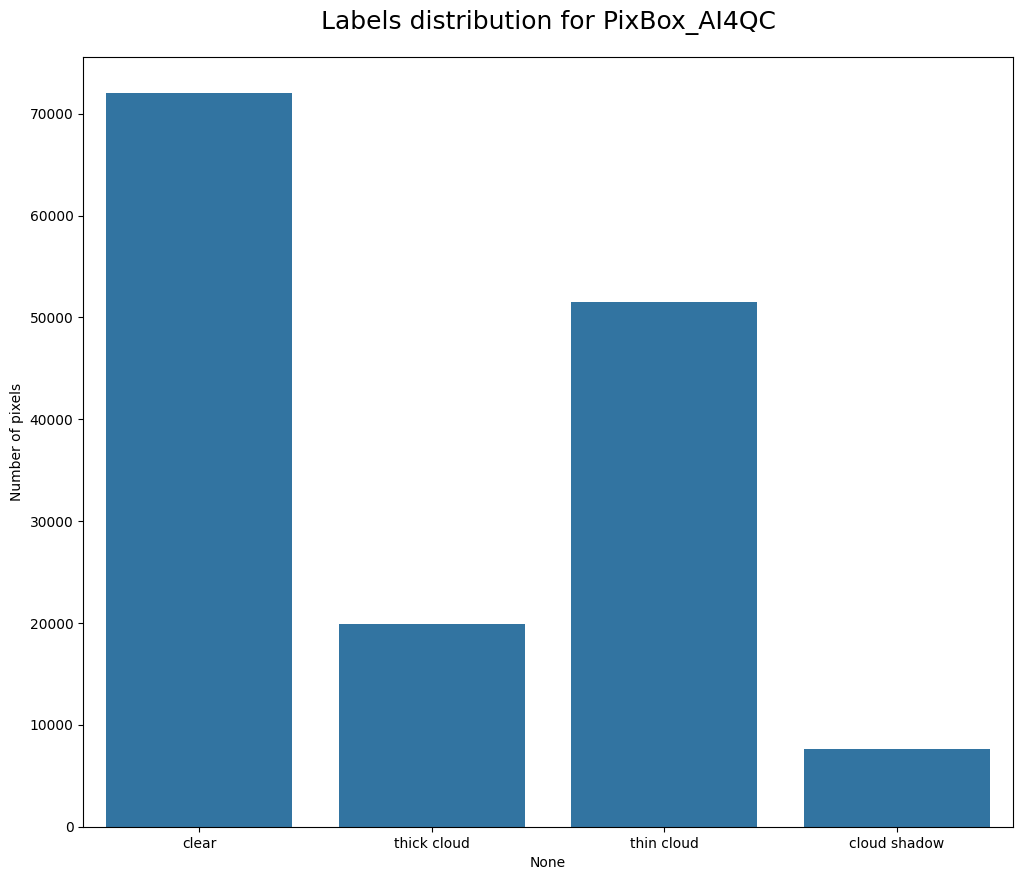

In [5]:
dataset.data_distribution_barchart();

# Working with Sentinel-2 true color RGB images

## Load training data

In [6]:
train_dataset_config = {
    "batch_size": 4,
    "shuffle": True,
    "num_workers": 4,
    "data_dir": "/home/dragik/data/PixBox",
    "selection":"rgb",
    "transforms": ["aitlas.transforms.ResizeToTensor"],
    "target_transforms": ["aitlas.transforms.Transpose","aitlas.transforms.ResizePerChannelToTensor"],
}
train_dataset = PixBox_AI4QCDataset(train_dataset_config)
len(train_dataset)

29

## Create the model

In [7]:
epochs = 5
model_directory = "/home/dragik/data/PixBox/experiments_rgb"
model_config = {
    "num_classes": 4, 
    "learning_rate": 0.0001,
    "pretrained": True, 
    "threshold": 0.5,
    "metrics": ["iou"]
}

model = DeepLabV3(model_config)
model.prepare()

## Start the training

In [8]:
model.train_model(
    train_dataset=train_dataset,
    epochs=epochs,
    model_directory=model_directory,
    run_id='1'
);

Starting training.


training: 100%|███████████████████████████████████████████████████████████████████████████| 7/7 [01:26<00:00, 12.30s/it]

epoch: 1, time: 86, loss:  0.96550



testing on train set: 100%|███████████████████████████████████████████████████████████████| 7/7 [01:27<00:00, 12.50s/it]

IOU:0.0, IOU mean:0.0, IOU per Class:[0. 0. 0. 0.]



training: 100%|███████████████████████████████████████████████████████████████████████████| 7/7 [01:26<00:00, 12.36s/it]

epoch: 2, time: 87, loss:  0.96550



testing on train set: 100%|███████████████████████████████████████████████████████████████| 7/7 [01:23<00:00, 11.94s/it]

IOU:0.0, IOU mean:0.0, IOU per Class:[0. 0. 0. 0.]



training: 100%|███████████████████████████████████████████████████████████████████████████| 7/7 [01:25<00:00, 12.23s/it]

epoch: 3, time: 86, loss:  0.96550



testing on train set: 100%|███████████████████████████████████████████████████████████████| 7/7 [01:27<00:00, 12.45s/it]

IOU:0.0, IOU mean:0.0, IOU per Class:[0. 0. 0. 0.]



training: 100%|███████████████████████████████████████████████████████████████████████████| 7/7 [01:26<00:00, 12.35s/it]

epoch: 4, time: 87, loss:  0.96550



testing on train set: 100%|███████████████████████████████████████████████████████████████| 7/7 [01:26<00:00, 12.38s/it]

IOU:0.0, IOU mean:0.0, IOU per Class:[0. 0. 0. 0.]



training: 100%|███████████████████████████████████████████████████████████████████████████| 7/7 [01:25<00:00, 12.18s/it]

epoch: 5, time: 86, loss:  0.96549



testing on train set: 100%|███████████████████████████████████████████████████████████████| 7/7 [01:27<00:00, 12.47s/it]

IOU:0.0, IOU mean:0.0, IOU per Class:[0. 0. 0. 0.]


Train loss: [0.9654979952450456, 0.965497115562702, 0.9654965565122408, 0.9654949204675083, 0.9654932268734636]
Validation loss: []
Train time per epochs: [86, 87, 86, 87, 86]
Finished training. training time: 432


# Working with the 13 bands of Sentinel-2

## Load training data

In [9]:
train_dataset_config = {
    "batch_size": 4,
    "shuffle": True,
    "num_workers": 0,
    "selection":"all",
    "data_dir": "/home/dragik/data/PixBox",
    "transforms": ["aitlas.transforms.ResizePerChannelToTensor"],
    "target_transforms": ["aitlas.transforms.Transpose","aitlas.transforms.ResizePerChannelToTensor"],
}
train_dataset = PixBox_AI4QCDataset(train_dataset_config)
len(train_dataset)

29

## Create the model

In [10]:
epochs = 5
model_directory = "/home/dragik/data/PixBox/experiments"
model_config = {
    "num_classes": 4, 
    "learning_rate": 0.0001,
    "pretrained": False, 
    "threshold": 0.5,
    "metrics": ["iou"],
    "input_dim": 13
}

model = DeepLabV3_13_bands(model_config)
model.prepare()

## Start the training

In [11]:
model.train_model(
    train_dataset=train_dataset,
    epochs=epochs,
    model_directory=model_directory,
    run_id='1'
);

Starting training.


training: 100%|██████████████████████████████████████████████████████████████████████████| 7/7 [20:37<00:00, 176.73s/it]

epoch: 1, time: 1238, loss:  0.96550



testing on train set: 100%|██████████████████████████████████████████████████████████████| 7/7 [20:45<00:00, 177.94s/it]

IOU:0.0, IOU mean:0.0, IOU per Class:[0. 0. 0. 0.]



training: 100%|██████████████████████████████████████████████████████████████████████████| 7/7 [20:33<00:00, 176.17s/it]

epoch: 2, time: 1233, loss:  0.96550



testing on train set: 100%|██████████████████████████████████████████████████████████████| 7/7 [20:40<00:00, 177.20s/it]

IOU:0.0, IOU mean:0.0, IOU per Class:[0. 0. 0. 0.]



training: 100%|██████████████████████████████████████████████████████████████████████████| 7/7 [20:46<00:00, 178.04s/it]

epoch: 3, time: 1246, loss:  0.96549



testing on train set: 100%|██████████████████████████████████████████████████████████████| 7/7 [20:42<00:00, 177.55s/it]

IOU:0.0, IOU mean:0.0, IOU per Class:[0. 0. 0. 0.]



training: 100%|██████████████████████████████████████████████████████████████████████████| 7/7 [20:36<00:00, 176.61s/it]

epoch: 4, time: 1236, loss:  0.96549



testing on train set: 100%|██████████████████████████████████████████████████████████████| 7/7 [20:43<00:00, 177.58s/it]

IOU:0.0, IOU mean:0.0, IOU per Class:[0. 0. 0. 0.]



training: 100%|██████████████████████████████████████████████████████████████████████████| 7/7 [20:46<00:00, 178.12s/it]

epoch: 5, time: 1247, loss:  0.96549



testing on train set: 100%|██████████████████████████████████████████████████████████████| 7/7 [20:46<00:00, 178.07s/it]

IOU:0.0, IOU mean:0.0, IOU per Class:[0. 0. 0. 0.]


Train loss: [0.9654996230684477, 0.9655004616441398, 0.9655009055959767, 0.9654994586418415, 0.965496984021417]
Validation loss: []
Train time per epochs: [1238, 1233, 1246, 1236, 1247]
Finished training. training time: 6200
